#Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

# Загрузка и первичный анализ данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.impute
import sklearn.preprocessing
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data=pd.read_csv("sample_data/googleplaystore.csv")

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [4]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


In [6]:
# типы колонок
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# размер набора данных
data.shape

(10841, 13)

# Обработка пропусков в данных

In [8]:
# проверим есть ли пропущенные значения
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((10841, 13), (10841, 8))

In [10]:
data_new_1.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Price', 'Genres',
       'Last Updated'],
      dtype='object')

In [11]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((10841, 13), (9360, 13))

In [12]:
# Найдем пропуски в данных в процентном соотношении
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

App - 0%
Category - 0%
Rating - 14%
Reviews - 0%
Size - 0%
Installs - 0%
Type - 0%
Price - 0%
Content Rating - 0%
Genres - 0%
Last Updated - 0%
Current Ver - 0%
Android Ver - 0%


In [13]:
data[data.columns].isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


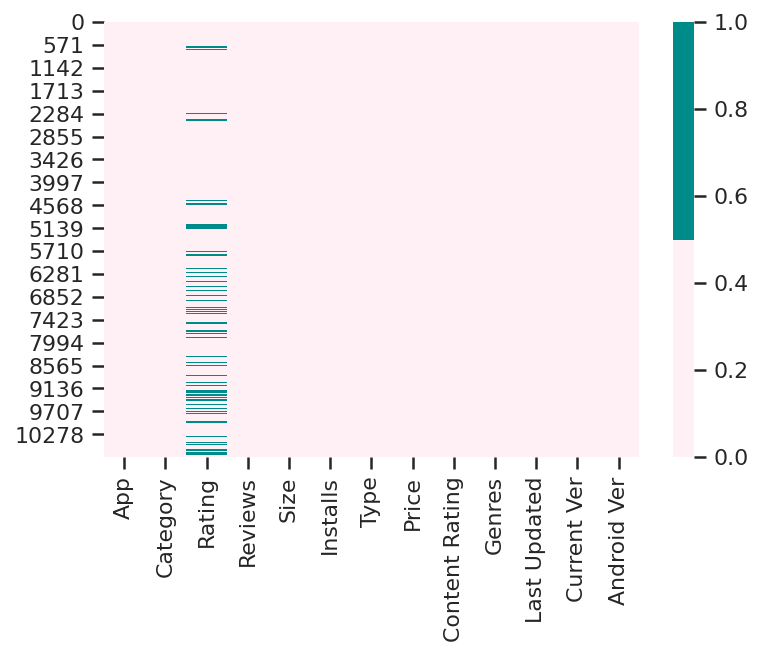

In [14]:
# Видим, что с заполнением пропусков нужно работать в колонке Rating
colors = ['#FFF0F5', '#008B8B']
sns.heatmap(data[data.columns].isnull(), cmap=sns.color_palette(colors))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


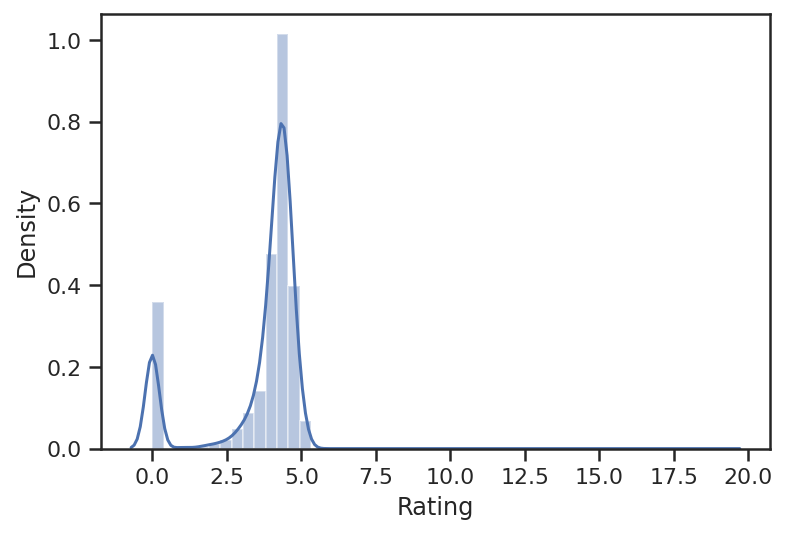

In [15]:
# Заполним пропуски в колонке нулями
sns.distplot(data['Rating'].fillna(0))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


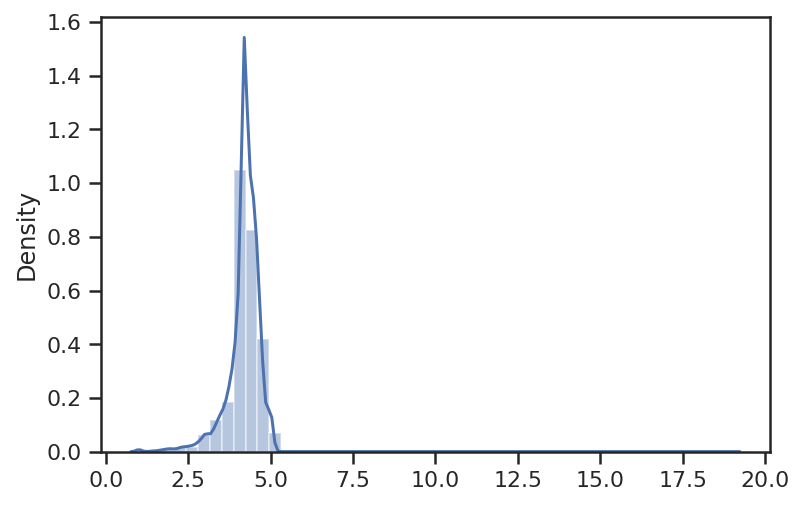

In [16]:
# Получили выброс в значении 0
# С помощью класса SimpleImputer можно проводить импьютацию различными показателями центра распределения
# Применим заполнение средними значениями
mean=sklearn.impute.SimpleImputer(strategy="mean")
mean_rate=mean.fit_transform(data[['Rating']])
sns.distplot(mean_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


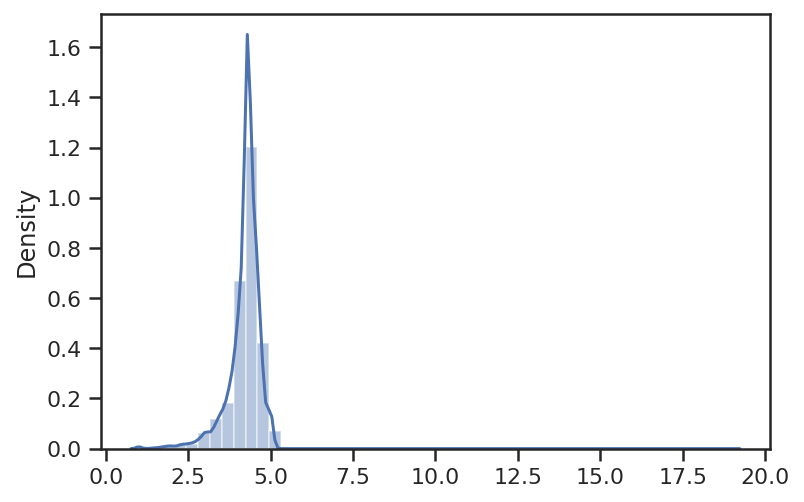

In [17]:
med=sklearn.impute.SimpleImputer(strategy="median")
med_rate=med.fit_transform(data[['Rating']])
sns.distplot(med_rate)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


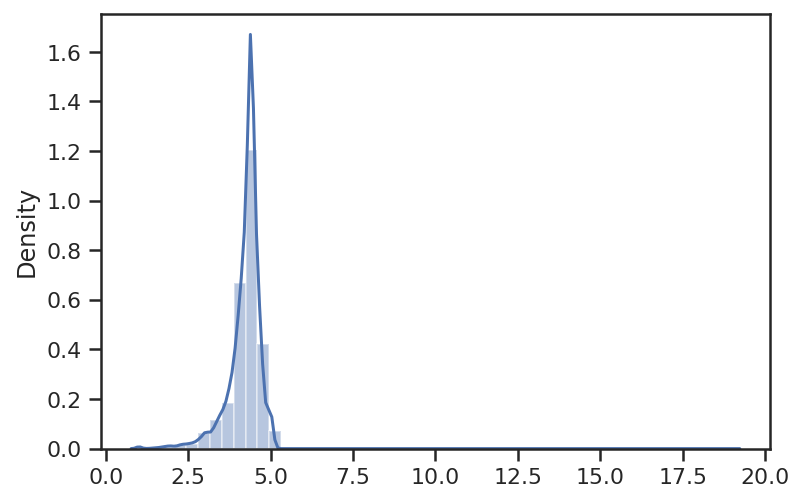

In [18]:
freq=sklearn.impute.SimpleImputer(strategy="most_frequent")
freq_rate=freq.fit_transform(data[['Rating']])
sns.distplot(freq_rate)

In [19]:
# Остановим выбор на средних значениях
data['Rating'] = mean_rate

**Обработка пропусков в категориальных данных**

In [20]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [21]:
cat_temp_data = data[['Content Rating']]
cat_temp_data.head()

,Content Rating
0,Everyone
1,Everyone
2,Everyone
3,Teen
4,Everyone


In [22]:
cat_temp_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [23]:
cat_temp_data[cat_temp_data['Content Rating'].isnull()]

,Content Rating
10472,NaN


In [24]:
# Импьютация наиболее частыми значениями
imp2 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Everyone'],
       ['Everyone'],
       ['Everyone'],
       ...,
       ['Everyone'],
       ['Mature 17+'],
       ['Everyone']], dtype=object)

In [25]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

In [26]:
# Импьютация константой
imp3 = sklearn.impute.SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Everyone'],
       ['Everyone'],
       ['Everyone'],
       ...,
       ['Everyone'],
       ['Mature 17+'],
       ['Everyone']], dtype=object)

In [27]:
np.unique(data_imp3)

array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+', 'NA',
       'Teen', 'Unrated'], dtype=object)

In [28]:
data_imp3[data_imp3=='NA'].size

1

In [29]:
data['Content Rating'] = data_imp2

In [30]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

# Кодирование категориальных признаков

In [31]:
types=data["Content Rating"]
types.value_counts()

Everyone           8715
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

**Кодирование категорий целочисленными значениями - label encoding**



In [32]:
le=sklearn.preprocessing.LabelEncoder()
type_le=le.fit_transform(types)
print(np.unique(type_le))
le.inverse_transform(np.unique(type_le))

[0 1 2 3 4 5]


array(['Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated'], dtype=object)

**Pandas get_dummies - быстрый вариант one-hot кодирования**

In [33]:
type_s=pd.get_dummies(types)
type_s.head(25)

,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,0,0,0,1,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,1,0,0,0,0
9,0,1,0,0,0,0


**Переходим  к масштабированию данных.**

Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два следующих подхода:


# MinMax масштабирование

In [34]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [35]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Rating']])

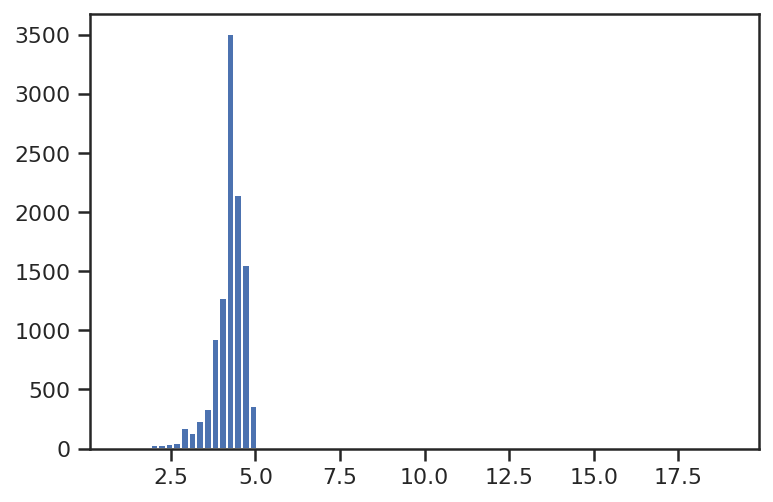

In [36]:
plt.hist(data['Rating'], 80)
plt.show()

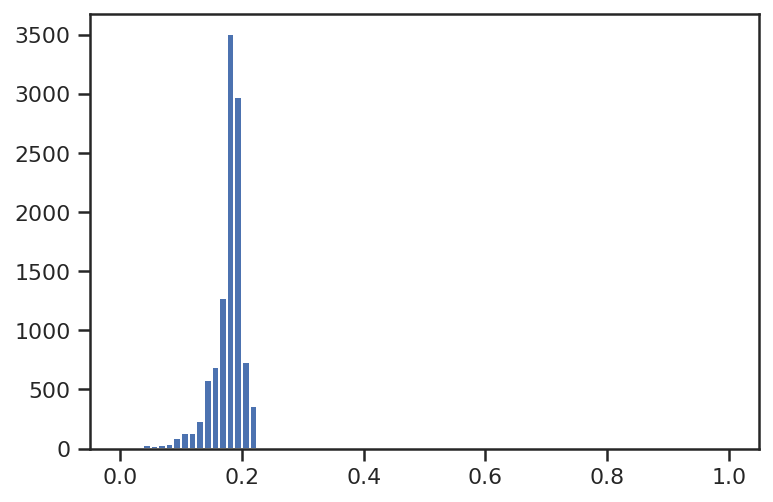

In [37]:
plt.hist(sc1_data, 80)
plt.show()

# Масштабирование данных на основе Z-оценки - StandardScaler

In [38]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Rating']])

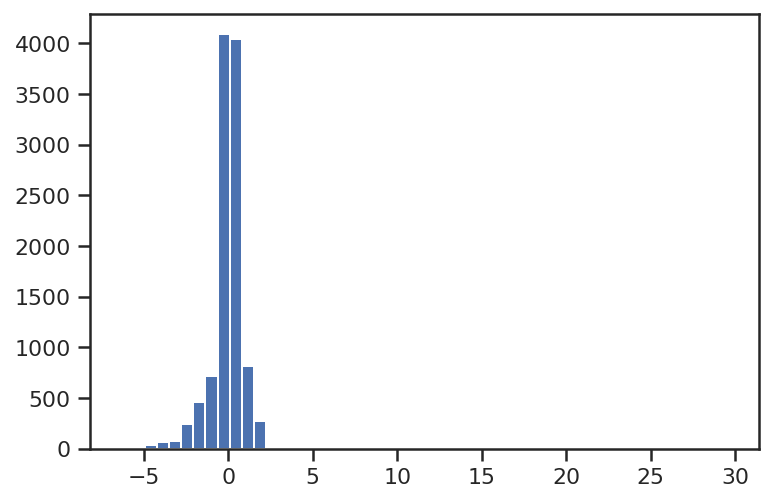

In [39]:
plt.hist(sc2_data, 50)
plt.show()